In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline 
sns.set(style= 'ticks')
url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv'
df = pd.read_csv(url, sep='\t')

In [3]:
df.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


In [4]:
print(df.head(20))

    order_id  quantity                              item_name  \
0          1         1           Chips and Fresh Tomato Salsa   
1          1         1                                   Izze   
2          1         1                       Nantucket Nectar   
3          1         1  Chips and Tomatillo-Green Chili Salsa   
4          2         2                           Chicken Bowl   
5          3         1                           Chicken Bowl   
6          3         1                          Side of Chips   
7          4         1                          Steak Burrito   
8          4         1                       Steak Soft Tacos   
9          5         1                          Steak Burrito   
10         5         1                    Chips and Guacamole   
11         6         1                   Chicken Crispy Tacos   
12         6         1                     Chicken Soft Tacos   
13         7         1                           Chicken Bowl   
14         7         1   

In [5]:
print(df.shape[0])
print(df.shape[1])
print(len(df))

4622
5
4622


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            4622 non-null   int64 
 1   quantity            4622 non-null   int64 
 2   item_name           4622 non-null   object
 3   choice_description  3376 non-null   object
 4   item_price          4622 non-null   object
dtypes: int64(2), object(3)
memory usage: 180.7+ KB


In [7]:
df.describe()

,order_id,quantity
count,4622.000000,4622.000000
mean,927.254868,1.075725
std,528.890796,0.410186
min,1.000000,1.000000
25%,477.250000,1.000000
50%,926.000000,1.000000
75%,1393.000000,1.000000
max,1834.000000,15.000000


In [8]:
df.isna().sum()

order_id                 0
quantity                 0
item_name                0
choice_description    1246
item_price               0
dtype: int64

In [9]:
print(df.columns)
print(df.index)

Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')
RangeIndex(start=0, stop=4622, step=1)


In [35]:
most_order = df.groupby('item_name').sum().sort_values('quantity', ascending=False)
print(f"sort by most order: {most_order}")


sort by most order:                                        order_id  quantity  \
item_name                                                   
Chicken Bowl                             713926       761   
Chicken Burrito                          497303       591   
Chips and Guacamole                      449959       506   
Steak Burrito                            328437       386   
Canned Soft Drink                        304753       351   
Chips                                    208004       230   
Steak Bowl                               193752       221   
Bottled Water                            175944       211   
Chips and Fresh Tomato Salsa             100419       130   
Canned Soda                               76396       126   
Chicken Salad Bowl                       117104       123   
Chicken Soft Tacos                        98395       120   
Side of Chips                             84769       110   
Veggie Burrito                            80962        97   
Barb

In [11]:
print(most_order['quantity'].values[0])

761


In [12]:
most_order_choice = df.groupby('choice_description').sum().sort_values('quantity', ascending=True)
print(most_order_choice)

                                                    order_id  quantity  \
choice_description                                                       
[Fresh Tomato Salsa, [Black Beans, Pinto Beans,...       974         1   
[[Tomatillo-Red Chili Salsa (Hot), Tomatillo-Gr...      1215         1   
[Tomatillo Green Chili Salsa, [Black Beans, Che...      1163         1   
[[Tomatillo-Red Chili Salsa (Hot), Roasted Chil...       186         1   
[[Tomatillo-Red Chili Salsa (Hot), Fresh Tomato...      1010         1   
...                                                      ...       ...   
[Fresh Tomato Salsa, [Rice, Black Beans, Cheese...     36041        42   
[Fresh Tomato Salsa, [Rice, Black Beans, Cheese...     43088        49   
[Sprite]                                               80426        89   
[Coke]                                                122752       143   
[Diet Coke]                                           123455       159   

                                     

In [13]:
print(df['item_price'].dtype)
df['item_price'] = df['item_price'].apply(lambda x:float(x[1:]))
print(df['item_price'].dtype)

object
float64


In [14]:
df['total_price'] = df['quantity'] * df['item_price']
total = df['total_price'].sum()
print(total)

39237.02


In [15]:
total_orders = df['order_id'].nunique()
print(f"total orders: {total_orders}")

total orders: 1834


In [16]:
avg = total / total_orders
diff = df['item_name'].nunique()
print(f"average per order: {avg}")
print(diff)

average per order: 21.39423118865867
50


In [17]:
df_group = df.groupby('order_id').sum()
avg_per_order = df_group['total_price'].mean()
print(f"average per order: {avg_per_order}")

average per order: 21.39423118865867


In [18]:
print(f"test: {df.groupby('item_name').item_price.agg(['mean', 'min', 'max']).head()}")
print(f"total: {df.groupby('item_name')['item_price'].agg(['mean' , 'min', 'max']).loc['Barbacoa Bowl']}")
print(f"group by: {df[df['item_name'] == 'Barbacoa Bowl'].groupby('item_name')['item_price'].agg(['mean' , 'min', 'max'])}")

test:                             mean   min    max
item_name                                    
6 Pack Soft Drink       6.610185  6.49  12.98
Barbacoa Bowl          10.187273  8.69  11.75
Barbacoa Burrito        9.832418  8.69  11.75
Barbacoa Crispy Tacos  10.928182  8.99  18.50
Barbacoa Salad Bowl    10.640000  9.39  11.89
total: mean    10.187273
min      8.690000
max     11.750000
Name: Barbacoa Bowl, dtype: float64
group by:                     mean   min    max
item_name                            
Barbacoa Bowl  10.187273  8.69  11.75


In [19]:
df[df['item_name'] == 'Barbacoa Bowl'].describe()

,order_id,quantity,item_price,total_price
count,66.000000,66.0,66.000000,66.000000
mean,817.757576,1.0,10.187273,10.187273
std,538.969246,0.0,1.260994,1.260994
min,19.000000,1.0,8.690000,8.690000
25%,428.750000,1.0,9.250000,9.250000
50%,690.500000,1.0,9.250000,9.250000
75%,1259.250000,1.0,11.750000,11.750000
max,1825.000000,1.0,11.750000,11.750000


In [20]:
print(f"total: {df.groupby('item_name')['item_price'].agg(['mean','min','max']).head()}")

total:                             mean   min    max
item_name                                    
6 Pack Soft Drink       6.610185  6.49  12.98
Barbacoa Bowl          10.187273  8.69  11.75
Barbacoa Burrito        9.832418  8.69  11.75
Barbacoa Crispy Tacos  10.928182  8.99  18.50
Barbacoa Salad Bowl    10.640000  9.39  11.89


In [21]:
df.loc[0:7, "order_id":"choice_description"]

,order_id,quantity,item_name,choice_description
0,1,1,Chips and Fresh Tomato Salsa,NaN
1,1,1,Izze,[Clementine]
2,1,1,Nantucket Nectar,[Apple]
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans..."
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou..."
6,3,1,Side of Chips,NaN
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables..."


In [22]:
df.head()

,order_id,quantity,item_name,choice_description,item_price,total_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39,2.39
1,1,1,Izze,[Clementine],3.39,3.39
2,1,1,Nantucket Nectar,[Apple],3.39,3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98,33.96


In [23]:
item_name_groupby = df.groupby('item_name').sum()
print(item_name_groupby)

                                       order_id  quantity  \
item_name                                                   
6 Pack Soft Drink                         52322        55   
Barbacoa Bowl                             53972        66   
Barbacoa Burrito                          74718        91   
Barbacoa Crispy Tacos                      5613        12   
Barbacoa Salad Bowl                        9708        10   
Barbacoa Soft Tacos                       18725        25   
Bottled Water                            175944       211   
Bowl                                        472         4   
Burrito                                    1550         6   
Canned Soda                               76396       126   
Canned Soft Drink                        304753       351   
Carnitas Bowl                             62742        71   
Carnitas Burrito                          51652        60   
Carnitas Crispy Tacos                      5868         8   
Carnitas Salad          

In [24]:
item_name_groupby['total_price'] = item_name_groupby['quantity'] * item_name_groupby['item_price']
item_name_groupby.head()

,order_id,quantity,choice_description,item_price,total_price
item_name,,,,,
6 Pack Soft Drink,52322,55,[Sprite][Diet Coke][Coke][Diet Coke][Diet Coke...,356.95,19632.25
Barbacoa Bowl,53972,66,"[Roasted Chili Corn Salsa, [Fajita Vegetables,...",672.36,44375.76
Barbacoa Burrito,74718,91,"[[Fresh Tomato Salsa (Mild), Tomatillo-Green C...",894.75,81422.25
Barbacoa Crispy Tacos,5613,12,"[Tomatillo Red Chili Salsa, [Rice, Black Beans...",120.21,1442.52
Barbacoa Salad Bowl,9708,10,"[Fresh Tomato Salsa, [Rice, Fajita Vegetables,...",106.40,1064.00


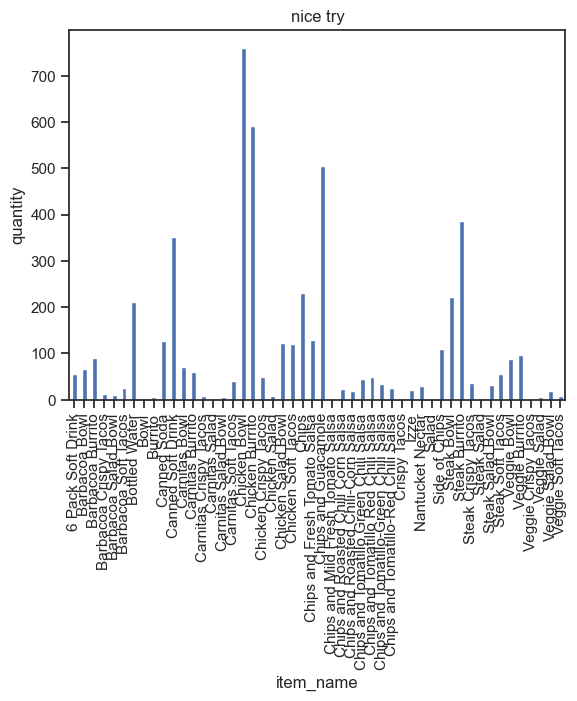

In [32]:
item_name_groupby['quantity'].plot(kind = 'bar')
plt.xlabel('item_name')
plt.ylabel('quantity')
plt.title('nice try')
plt.show()

In [47]:
first = item_name_groupby.sort_values('quantity', ascending=False)[['quantity', 'choice_description','item_price']]
second = item_name_groupby.sort_values('quantity', ascending= False).loc[:, 'quantity': 'item_price']
print(f"first {first.head()}")
print(f"second: {second}")

first                      quantity  \
item_name                       
Chicken Bowl              761   
Chicken Burrito           591   
Chips and Guacamole       506   
Steak Burrito             386   
Canned Soft Drink         351   

                                                    choice_description  \
item_name                                                                
Chicken Bowl         [Tomatillo-Red Chili Salsa (Hot), [Black Beans...   
Chicken Burrito      [Tomatillo-Green Chili Salsa (Medium), [Pinto ...   
Chips and Guacamole                                                  0   
Steak Burrito        [Tomatillo Red Chili Salsa, [Fajita Vegetables...   
Canned Soft Drink    [Coke][Sprite][Coke][Coke][Lemonade][Sprite][D...   

                     item_price  
item_name                        
Chicken Bowl            7342.73  
Chicken Burrito         5575.82  
Chips and Guacamole     2201.04  
Steak Burrito           3851.43  
Canned Soft Drink        438.75  
secon

In [56]:
item_name_groupby['total_price'] = item_name_groupby['total_price'].astype(int)
greater_than_8000 = item_name_groupby[item_name_groupby['total_price'] > 8000]
print(f"name: {greater_than_8000}")

name:                               order_id  quantity  \
item_name                                          
6 Pack Soft Drink                52322        55   
Barbacoa Bowl                    53972        66   
Barbacoa Burrito                 74718        91   
Bottled Water                   175944       211   
Canned Soda                      76396       126   
Canned Soft Drink               304753       351   
Carnitas Bowl                    62742        71   
Carnitas Burrito                 51652        60   
Carnitas Soft Tacos              37673        40   
Chicken Bowl                    713926       761   
Chicken Burrito                 497303       591   
Chicken Crispy Tacos             47382        50   
Chicken Salad Bowl              117104       123   
Chicken Soft Tacos               98395       120   
Chips                           208004       230   
Chips and Fresh Tomato Salsa    100419       130   
Chips and Guacamole             449959       506   
Side o